In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import matplotlib.dates as mdates

In [4]:
import os

In [5]:
days = [20,21,28,29,30]
colors = ['yellow','green','blue','gray','purple']
days_dict = {'yellow':29,'purple':30,'green':28,'blue':21,'gray':20}

In [6]:
colors_days = {20:'#ABB2B9',
               21:'#5DADE2',
               28:'#16A085',
               29:'#D4AC0D',
               30:'#A569BD'}

In [7]:
# ylab       = "Spatially Averaged\nFriction Velocity\n"+r"$\langle u_* \rangle$ [m/s]"
# qoi = 'ust'

ylab       = "Spatially Averaged\nSurface Heat Flux\n"+r"$\langle HFX + LH \rangle$ [W/m$^2$]"
qoi = 'hfx'

In [8]:
data = {}
data_clean = {}

for color in colors:
    day = days_dict[color]
    data[day] = pd.read_csv("../digitized-data/{0}_{1}.csv".format(qoi,color), index_col=[0],
                             parse_dates=True,header=None)
    data[day] = data[day].resample('1min').mean().interpolate()    
    
    start = pd.to_datetime('2015-01-{0} 14:10'.format(1))
    end   = pd.to_datetime('2015-01-{0} 23:50'.format(1))    
    idx   = pd.date_range(start=start, end=end, freq='1min')  
    
    tmp = data[day].reindex(idx)
    
    start = pd.to_datetime('2015-03-{0} 14:10'.format(day))
    end   = pd.to_datetime('2015-03-{0} 23:50'.format(day))
    idx   = pd.date_range(start=start, end=end, freq='1min')  
    
    data_clean[day] = tmp.reset_index().set_index(idx)
    junk = data_clean[day].pop('index')
    
    data_clean[day] = data_clean[day].resample('5min').mean()

# plot

/Users/pdoubraw/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


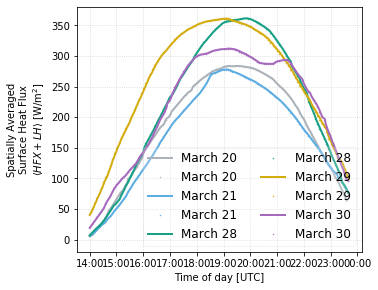

In [9]:
start_datetime_to_plot = pd.Timestamp('20180606')

fig = plt.figure(figsize=(6,5))
ax  = fig.add_subplot(111)

iday = 0
for day in days:
           
    series      = data[day]
    time_deltas = series.index-series.index[0]+pd.Timedelta('14h')
    index       = start_datetime_to_plot+time_deltas
       
    ax.plot(index,
            series.values,color=colors_days[day],linestyle='-',lw=2,marker='None',label='March {0}'.format(day))

    series = data_clean[day]
    time_deltas = series.index-series.index[0]+pd.Timedelta('14h')
    index       = start_datetime_to_plot+time_deltas    
    ax.plot(index,
            series.values,color=colors_days[day],linestyle='-',lw=0,marker='.',ms=1,label='March {0}'.format(day))

if qoi=='ust':
    ax.set_ylim(0.05,0.75)
if qoi=='hfx':
    ax.set_ylim(-20,380)
    
xticks = index[0::6]
xticks = xticks.append(pd.DatetimeIndex([start+pd.Timedelta('24h')]))
# ax.set_xticks(xticks)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# ax.set_xticklabels(["14:00\n(08:00 LT)","","16:00","","18:00","","20:00","","22:00","","24:00\n(18:00 LT)"])
# ax.set_xlim([xticks[0],xticks[-1]])

ax.set_xlabel("Time of day [UTC]")

ax.grid(color='lightgray',linestyle=':')

ax.set_ylabel(ylab)

lg = plt.legend(ncol=2,fontsize=12,framealpha=0.2)
fig.subplots_adjust(left=0.22,bottom=0.2,right=0.88)

# fig.savefig("/glade/u/home/doubrawa/figs/ust_diurnal_cycles_with_shading.png",dpi=300)

# save

In [50]:
outpath = "/Volumes/Baby-Orange/XPIA-NCAR/processed/"

for day in days:
    
    fname   = "HFX_SPATIAL_AVG_15km_by_15km_D02_March{0}.csv".format(day)
    fout    = os.path.join(outpath,fname)
    data_clean[day].to_csv(fout)
    print("==> {0}".format(fout))

==> /Volumes/Baby-Orange/XPIA-NCAR/processed/HFX_SPATIAL_AVG_15km_by_15km_D02_March20.csv
==> /Volumes/Baby-Orange/XPIA-NCAR/processed/HFX_SPATIAL_AVG_15km_by_15km_D02_March21.csv
==> /Volumes/Baby-Orange/XPIA-NCAR/processed/HFX_SPATIAL_AVG_15km_by_15km_D02_March28.csv
==> /Volumes/Baby-Orange/XPIA-NCAR/processed/HFX_SPATIAL_AVG_15km_by_15km_D02_March29.csv
==> /Volumes/Baby-Orange/XPIA-NCAR/processed/HFX_SPATIAL_AVG_15km_by_15km_D02_March30.csv


In [10]:
data_clean[21]

,1
2015-03-21 14:10:00,7.183472
2015-03-21 14:15:00,9.171995
2015-03-21 14:20:00,12.560024
2015-03-21 14:25:00,16.441609
2015-03-21 14:30:00,20.404355
2015-03-21 14:35:00,23.664096
2015-03-21 14:40:00,26.452161
2015-03-21 14:45:00,30.208333
2015-03-21 14:50:00,34.970238
2015-03-21 14:55:00,38.466915
